<a href="https://colab.research.google.com/github/anjalii-8/Data-Analytics-Projects/blob/main/TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

In [ ]:
import pandas as pd

# Load the Titanic dataset from the provided CSV file
df = pd.read_csv('titanic_with_nan.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Cleaning**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             89
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        89
dtype: int64


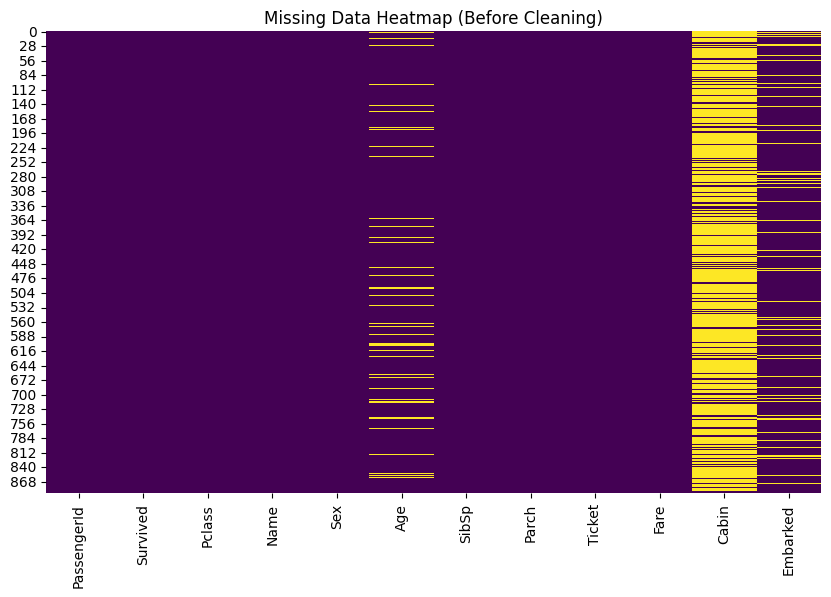

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize missing data in the dataset
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Before Cleaning)')
plt.show()


In [ ]:
# Replace missing values in the Age column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
# Replace missing values in the Embarked column with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Replace missing values in the Cabin column with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove any duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


# **Data Transformation**

In [ ]:
# Create a new column 'FamilySize' as the sum of SibSp and Parch, plus one
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
# Create a new column 'IsAdult' where True indicates the passenger is older than 18, False otherwise
df['IsAdult'] = df['Age'] > 18

# **Data Visualization**

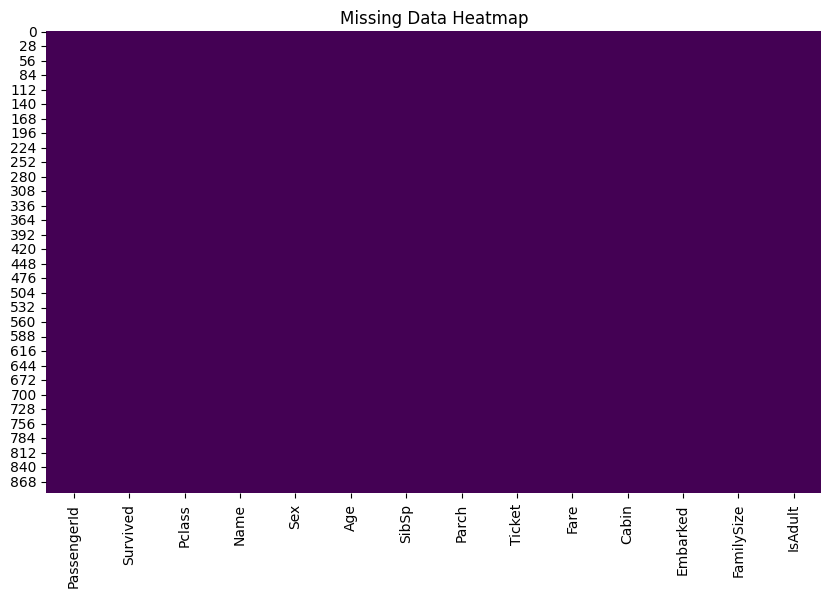

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize missing data in the dataset after cleaning
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

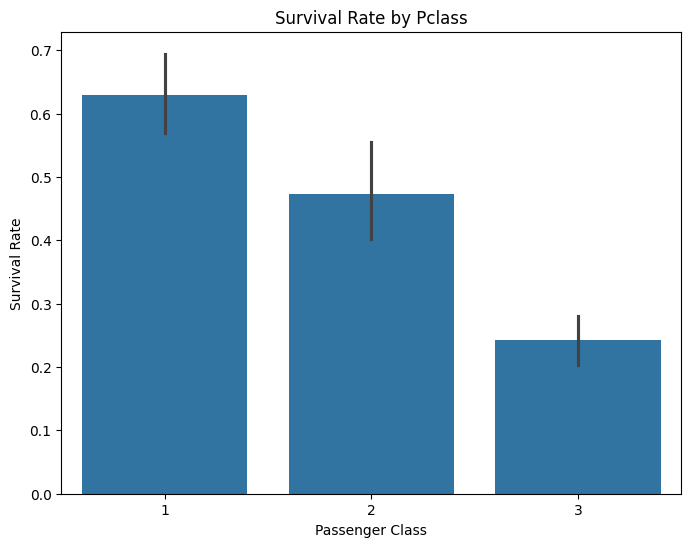

In [ ]:
# Create a bar plot to show the survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

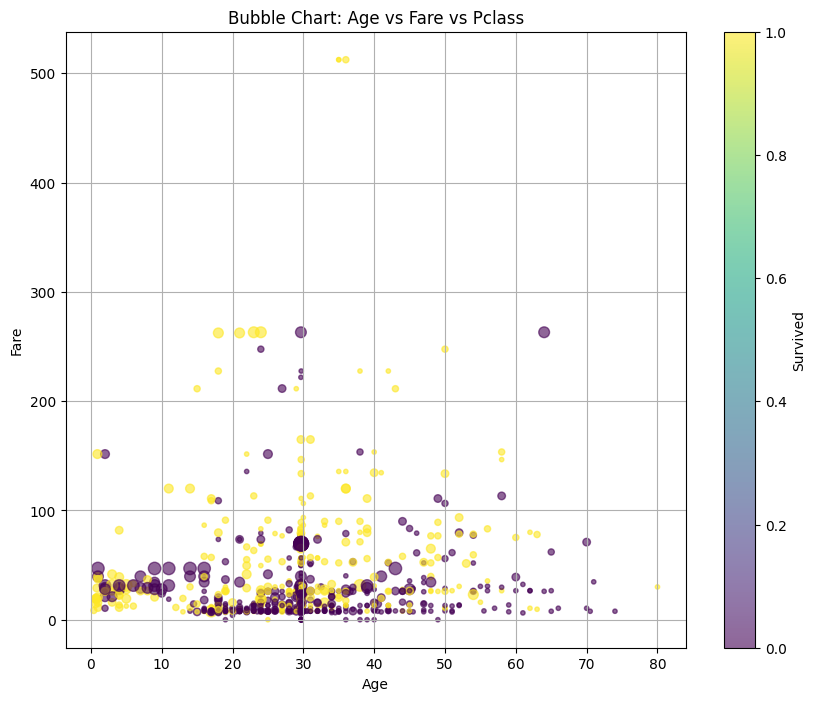

In [ ]:
# Create a bubble chart showing the relationship between Age, Fare, and Pclass
plt.figure(figsize=(10, 8))
bubble_chart = plt.scatter(
    df['Age'],
    df['Fare'],
    s=df['FamilySize'] * 10,  # Bubble size represents FamilySize
    c=df['Survived'],         # Color represents Survival
    alpha=0.6
)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Bubble Chart: Age vs Fare vs Pclass')
plt.colorbar(label='Survived')  # Add color bar to indicate survival
plt.grid(True)
plt.show()

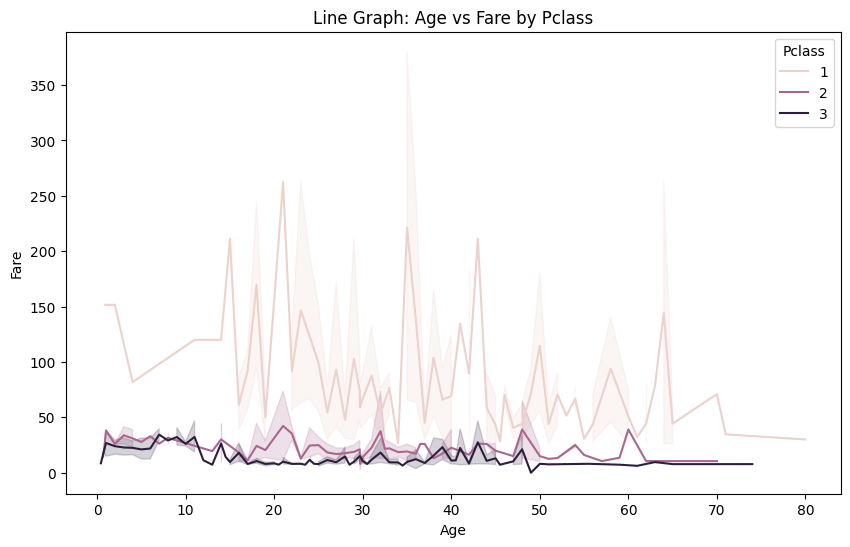

In [ ]:
# Create a line graph showing the relationship between Age, Fare, and Pclass
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Line Graph: Age vs Fare by Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# **Descriptive Statistics**

In [ ]:
# Calculate and display summary statistics for Age, Fare, and FamilySize
summary_stats = df[['Age', 'Fare', 'FamilySize']].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               Age        Fare  FamilySize
count  891.000000  891.000000  891.000000
mean    29.657149   32.204208    1.904602
std     12.379023   49.693429    1.613459
min      0.420000    0.000000    1.000000
25%     23.000000    7.910400    1.000000
50%     29.699118   14.454200    1.000000
75%     34.000000   31.000000    2.000000
max     80.000000  512.329200   11.000000


# **Report**

**Steps Taken:**

1. **Data Cleaning:**
   - **Missing Values:** Replaced missing values in the `Age` column with the mean, in `Embarked` with the mode, and in `Cabin` with 'Unknown'.
   - **Duplicates:** Identified and removed duplicate rows.

2. **Data Transformation:**
   - Created a `FamilySize` feature by summing `SibSp`, `Parch`, and adding 1.
   - Created an `IsAdult` feature to classify passengers as adults or non-adults.

3. **Data Visualization:**
   - **Heatmaps:**
     - **Before Cleaning:** Visualized missing data before any cleaning was applied.
     - **After Cleaning:** Visualized missing data after cleaning to confirm that all missing values were addressed.
   - **Bar Plot:** Examined survival rates by passenger class (`Pclass`).
   - **Bubble Chart:** Explored relationships among `Age`, `Fare`, and `Pclass`.
   - **Line Graph:** Analyzed trends between `Age`, `Fare`, and `Pclass`.

4. **Descriptive Statistics:**
   - Generated summary statistics for `Age`, `Fare`, and `FamilySize`.

---

**Challenges:**
- **Heatmaps:** Ensuring that missing data was correctly visualized both before and after cleaning. Initial heatmaps showed missing data, while subsequent heatmaps confirmed the effectiveness of the cleaning process.
- **Feature Engineering:** Creating the `FamilySize` and `IsAdult` features required careful consideration to ensure they provided meaningful insights.

**Insights:**
- Higher-class passengers had higher survival rates, indicating socio-economic factors significantly impacted survival chances.
- The heatmaps confirmed that missing values were properly addressed, and the visualizations revealed key patterns and relationships that will be useful for further analysis.